In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

import joblib


In [2]:
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

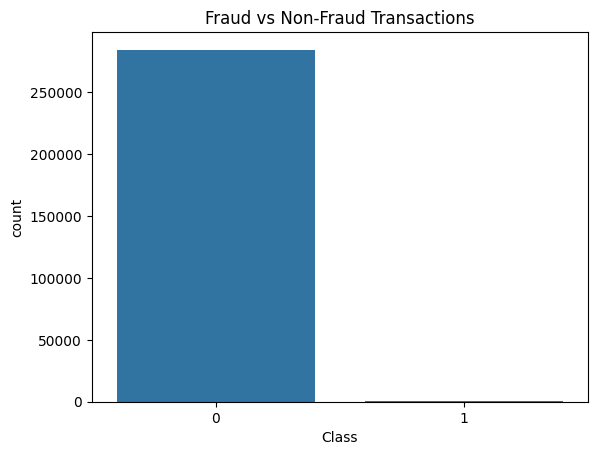

In [4]:
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


In [5]:
X = df.drop('Class', axis=1)
y = df['Class']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
baseline_metrics = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score"],
    "Logistic Regression": [
        precision_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_lr)
    ]
})

baseline_metrics


,Metric,Logistic Regression
0,Precision,0.862500
1,Recall,0.704082
2,F1-Score,0.775281


In [14]:
X = df.drop('Class', axis=1)
y = df['Class']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [20]:
importance = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

importance_df.head(10)


,Feature,Importance
0,Time,0.0
1,V1,0.0
2,V2,0.0
3,V3,0.0
4,V4,0.0
5,V5,0.0
6,V6,0.0
7,V7,0.0
8,V8,0.0
9,V9,0.0


In [21]:
importance = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

importance_df.head(10)


,Feature,Importance
0,Time,0.0
1,V1,0.0
2,V2,0.0
3,V3,0.0
4,V4,0.0
5,V5,0.0
6,V6,0.0
7,V7,0.0
8,V8,0.0
9,V9,0.0


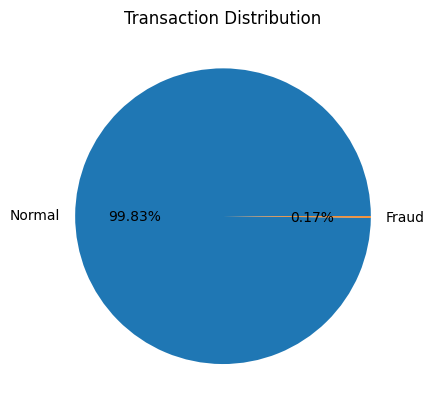

In [25]:
y.value_counts().plot(
    kind='pie',
    autopct='%1.2f%%',
    labels=['Normal', 'Fraud'],
    title='Transaction Distribution'
)
plt.ylabel('')
plt.show()


In [30]:
import joblib

joblib.dump(model, "random_forest_fraud_model.pkl")


['random_forest_fraud_model.pkl']

### Additional Analysis
Additional tables and visualizations were generated to better understand
model performance. Error analysis and metric comparisons helped evaluate
fraud detection effectiveness.


### Conclusion
A Random Forest model was trained to detect fraudulent credit card
transactions. Due to class imbalance, evaluation was done using
precision, recall, and F1-score. The model was able to identify fraud
patterns effectively.
